## Simulation Results

Two sets of simulations:

1. **First Set of Simulations**:
    - Trails: Three (Beta: 0.1, 0.5, 0.9)
    - Parameters:
        - Large size factor: 0.3
        - Batch size: 30
        - Temperature: 0.5
    

2. **Second Set of Simulations**:
    - Trails: Five (Beta: 0.1, 0.5, 0.9)
    - Parameters:
        - Large size factor: 0.05
        - Batch size: 30
        - Temperature: 0.5

In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from collections import Counter
import anndata as ad
import seaborn as sns
import pandas as pd
from sklearn.metrics import calinski_harabasz_score

/opt/anaconda3/envs/scvi-env-arm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
exp_id = "exp4"

In [3]:
input_dir = f"/Users/apple/Desktop/KB/data/feat_simulation/scvi_sim_result/{exp_id}"
output_dir = "/Users/apple/Desktop/KB/SCSeq_LineageBarcoding2/SCSeq_LineageBarcoding/SCLineage_ConstrativeLearning/out/plot/feat_simulation"
num_top_lg_toplot = 5

adata_input_dir = f"/Users/apple/Desktop/KB/data/LarryData/Larry_simulation/Larry_simulation_4scvi/{exp_id}"
#simulation data
adata_01 = ad.read_h5ad(adata_input_dir+f'/adata_scvi_sim01_{exp_id}.h5ad')
lineage_label_01 = adata_01.obs["clone_id"].to_numpy()

adata_03 = ad.read_h5ad(adata_input_dir+f'/adata_scvi_sim03_{exp_id}.h5ad')
lineage_label_03 = adata_03.obs["clone_id"].to_numpy()

adata_05 = ad.read_h5ad(adata_input_dir+f'/adata_scvi_sim05_{exp_id}.h5ad')
lineage_label_05 = adata_05.obs["clone_id"].to_numpy()

adata_07 = ad.read_h5ad(adata_input_dir+f'/adata_scvi_sim07_{exp_id}.h5ad')
lineage_label_07 = adata_07.obs["clone_id"].to_numpy()

adata_09 = ad.read_h5ad(adata_input_dir+f'/adata_scvi_sim09_{exp_id}.h5ad')
lineage_label_09 = adata_09.obs["clone_id"].to_numpy()

#set 2
x_005_01 = np.load(input_dir+f"/Larry_scvi_sim_01_{exp_id}.npy")
x_005_03 = np.load(input_dir+f"/Larry_scvi_sim_03_{exp_id}.npy")
x_005_05 = np.load(input_dir+f"/Larry_scvi_sim_05_{exp_id}.npy")
x_005_07 = np.load(input_dir+f"/Larry_scvi_sim_07_{exp_id}.npy")
x_005_09 = np.load(input_dir+f"/Larry_scvi_sim_09_{exp_id}.npy")


In [4]:

adata_01.obs['Cell type annotation'] = adata_01.obs["state_info"]
adata_03.obs['Cell type annotation'] = adata_03.obs["state_info"]
adata_05.obs['Cell type annotation'] = adata_05.obs["state_info"]
adata_07.obs['Cell type annotation'] = adata_07.obs["state_info"]
adata_09.obs['Cell type annotation'] = adata_09.obs["state_info"]

### Calinski Scores

In [5]:
# set 2
score_005_01 = calinski_harabasz_score(x_005_01, lineage_label_01)
score_005_03 = calinski_harabasz_score(x_005_03, lineage_label_03)
score_005_05 = calinski_harabasz_score(x_005_05, lineage_label_05)
score_005_07 = calinski_harabasz_score(x_005_07, lineage_label_07)
score_005_09 = calinski_harabasz_score(x_005_09, lineage_label_09)

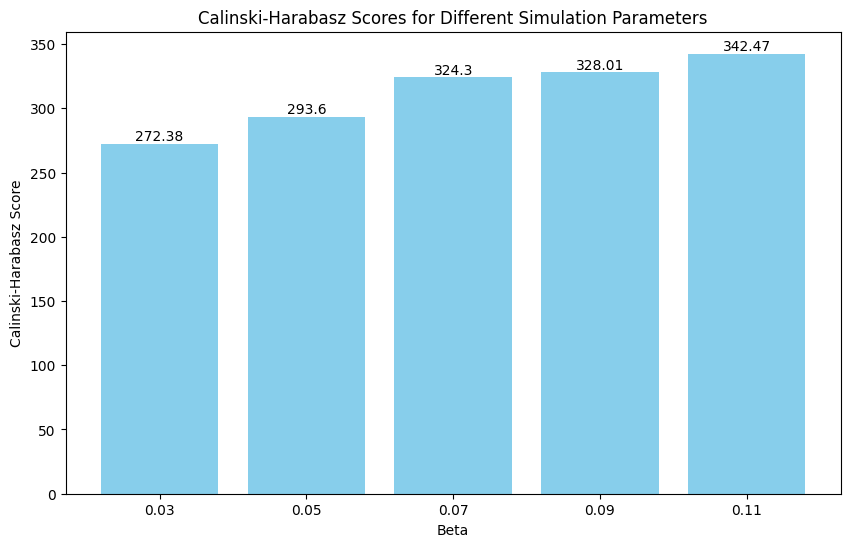

In [6]:
# Combine the scores
# scores = [score_005_09, score_005_07, score_005_05, score_005_03, score_005_01]
scores = [score_005_01, score_005_03, score_005_05, score_005_07, score_005_09]
# labels = [ '51', '201', '388', '587', '776']
# labels = [ '0.1', '0.3', '0.5', '0.7', '0.9']
labels = [ '0.03', '0.05', '0.07', '0.09', '0.11']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, scores, color='skyblue')

# Adding the scores on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Beta')
# plt.xlabel('number of lineages')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Scores for Different Simulation Parameters')
plt.show()